In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('ch08_안전운전예측//train.csv', index_col='id')
test = pd.read_csv('ch08_안전운전예측/test.csv', index_col='id')

In [7]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [8]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

## 핵심은 보험금 청구할 확률 = 1 이 얼마나 되는지

In [16]:
train_copy = train.copy().replace(-1, np.nan)

<Axes: >

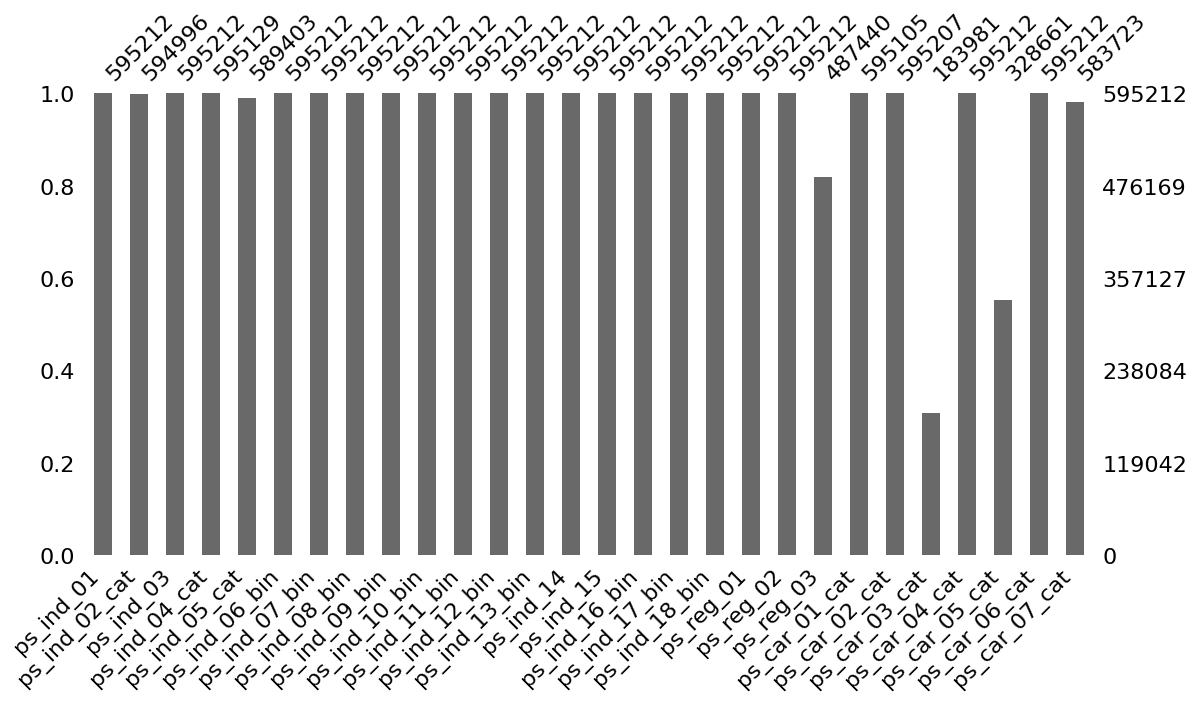

In [18]:
msno.bar(df=train_copy.iloc[:, 1:29], figsize = (13,6))

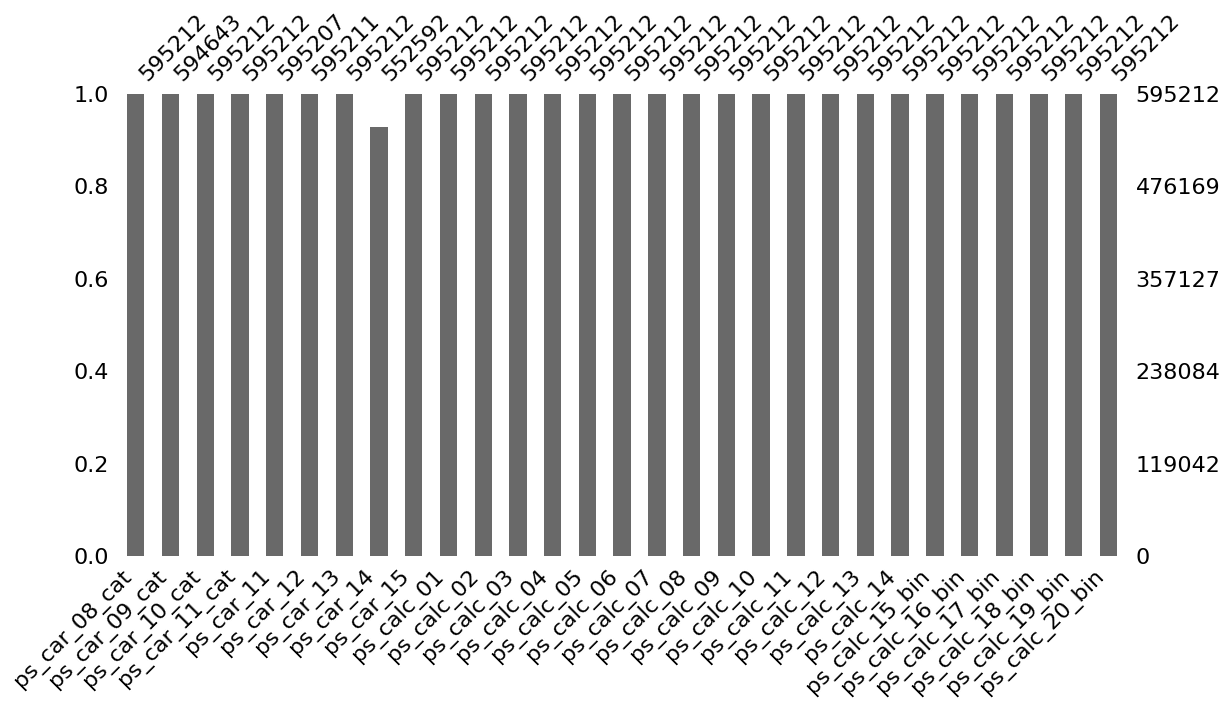

In [19]:
msno.bar(df=train_copy.iloc[:, 29:], figsize = (13,6));

In [20]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고유값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
    return summary
          

In [22]:
summary = resumetable(train)
summary.head()

데이터셋 형상 : (595212, 58)


,데이터타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

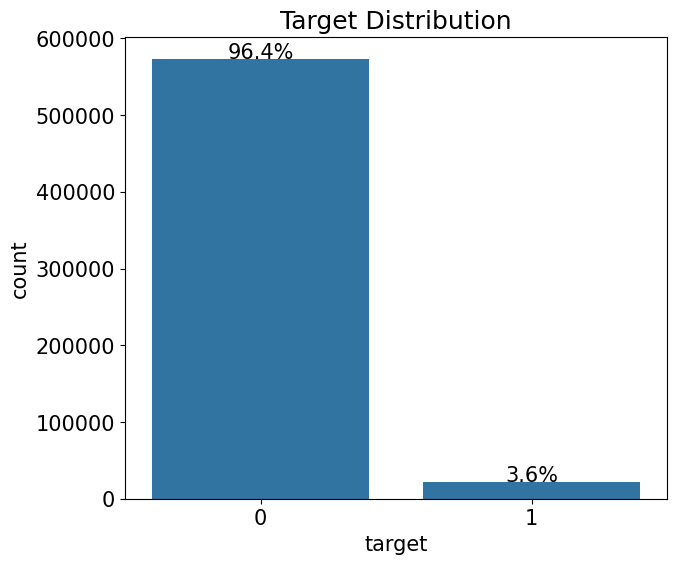

In [24]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(left_coord + width/2.0, height + total_size*0.001, '{:1.1f}%'.format(percent), ha='center')
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax= sns.countplot(x= 'target', data=train)
write_percent(ax, len(train))        
ax.set_title('Target Distribution')
       

In [26]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

In [27]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_features = [feature for feature in all_features if 'cat' in feature]
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20832392 stored elements and shape (1488028, 184)>

In [66]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']
remaining_features = [feature for feature in all_features if('cat' not in feature and 'calc' not in feature and feature not in drop_features)]

In [67]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format = 'csr')

In [68]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 핵심 피처 엔지니어링을 통한 성능 개선

In [ ]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [76]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

## 베이스라인 모델 지표_LightGBM
- 성능 평가점수 : 정규화 지니계수

In [77]:
from sklearn.model_selection import StratifiedGroupKFold

In [78]:
folds = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state= 1991)

In [79]:
params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

In [80]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

In [ ]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정 
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성 
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련 
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=1000, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          early_stopping_rounds=100, # 조기종료 조건
                          verbose_eval=100)     # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

AttributeError: 'csr_matrix' object has no attribute 'values'

In [83]:
import pandas as pd
from scipy.stats import rankdata

def get_rank_probabilities(pred_prob_array):
    """
    확률값을 0~1 사이의 Rank로 변환하는 함수
    예: [0.1, 0.4, 0.9] -> [0.0, 0.5, 1.0] (순위 비율)
    """
    # rankdata: 작은 값부터 순위를 매김 (1등, 2등...)
    ranks = rankdata(pred_prob_array)
    # 0~1 사이로 정규화 (최대 순위로 나눔)
    return ranks / len(ranks)

# 가상의 두 모델 예측값 (Validation Set에 대한 predict_proba 결과)
# 실제 코드에서는 model.predict_proba(X_val)[:, 1] 값을 넣으세요.
pred_model_a = np.array([0.1, 0.8, 0.3, 0.9, 0.2]) 
pred_model_b = np.array([0.05, 0.95, 0.2, 0.99, 0.1])

# 1. 단순 평균 (Soft Voting)
simple_blend = (pred_model_a + pred_model_b) / 2

# 2. 랭크 평균 (Rank Averaging) - Gini 최적화에 유리
rank_blend = (get_rank_probabilities(pred_model_a) + get_rank_probabilities(pred_model_b)) / 2

print("단순 평균:", simple_blend)
print("랭크 평균:", rank_blend)
# 최종 제출 시 rank_blend를 사용

단순 평균: [0.075 0.875 0.25  0.945 0.15 ]
랭크 평균: [0.2 0.8 0.6 1.  0.4]


In [89]:
def plot_prob_distribution(y_true, y_prob):
    """
    실제 타겟별 예측 확률 분포를 시각화
    """
    plt.figure(figsize=(10, 6))
    
    # Target=0 (안전 운전자)인 경우의 예측 확률 분포
    sns.kdeplot(y_prob[y_true == 0], label='Target=0 (Safe)', shade=True, color='blue')
    
    # Target=1 (사고 운전자)인 경우의 예측 확률 분포
    sns.kdeplot(y_prob[y_true == 1], label='Target=1 (Accident)', shade=True, color='red')
    
    plt.title('Distribution of Predicted Probabilities by Class', fontsize=15)
    plt.xlabel('Predicted Probability (Risk)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

# 사용 예시 (모델 학습 후 검증 데이터로 확인)
y_val: 실제값, y_pred_prob: model.predict_proba(X_val)[:, 1]
plot_prob_distribution(y_val, y_pred_prob)

SyntaxError: invalid syntax (2743602182.py, line 20)

In [90]:
from sklearn.model_selection import StratifiedKFold
# 모델은 이미 정의되었다고 가정 (예: lgbm_wrapper)

def get_oof_predictions(model, X, y, n_splits=5):
    # 결과를 담을 배열 (전체 데이터 길이만큼 0으로 초기화)
    oof_preds = np.zeros(X.shape[0])
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        # 데이터 분할
        X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
        X_val_fold, y_val_fold = X.iloc[valid_idx], y.iloc[valid_idx]
        
        # 학습
        model.fit(X_train_fold, y_train_fold)
        
        # **핵심: predict가 아닌 predict_proba의 [:, 1] (양성 클래스 확률) 사용**
        # 해당 폴드의 검증 데이터에 대한 확률을 저장
        oof_preds[valid_idx] = model.predict_proba(X_val_fold)[:, 1]
        
        print(f"Fold {fold_idx+1} Completed.")
        
    return oof_preds

# 실행
oof_probabilities = get_oof_predictions(your_model, X_train, y_train)
print("CV Gini Score:", eval_gini(y_train, oof_probabilities))

NameError: name 'your_model' is not defined